In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./titanic/train.csv')

In [3]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Присутствуют 12 столбцов: 
1. PassengerId - id пассажира
2. Survived - выжил пассажир или нет, 1 = выжил, 0 = нет
3. Pclass - В каком классе был пассажир, от 1 до 3
4. Name - имя
5. Sex - пол
6. Age - возраст
7. SibSp - количество сибсов/супругов на борту
8. Parch - количество детей/родителей на борту
9. Ticket - номер билета
10. Fare - тариф?
11. Cabin - номер каюты
12. Embarked - порт отправки, C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 1.2
Проверьте, имеются ли пропущенные значения в колонках, и выведите сумму всех пропущенных значений в каждой из колонок.

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 1.3
Замените все пропущенные значения колонки Age на медианы в зависимости от пола человека: т.е. если пол человека в строке с пропущенным значением "male", заменяете пропущенное значение возраста на медиану по всем известным возрастам мужчин, и наоборот. Выведите медианы возраста в зависимости от пола. Пропущенные значения колонок Cabin и Embarked замените на U (Unknown).   

   Примечание: для группировки по полу можно использовать метод df.groupby(), который имеет встроенные агрегатные функции (в т.ч. для вычисления медианы). Для установки пропущенных значений в датасете воспользуйтесь функцией df.apply().

In [7]:
df['Cabin'] = df['Cabin'].fillna('U')
df['Embarked'] = df['Embarked'].fillna('U')


In [8]:
df.groupby('Sex')['Age'].agg('median')

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [9]:
df[df['Sex'] == 'male'] = df[df['Sex'] == 'male'].fillna(df.groupby('Sex')['Age'].agg('median')['male'])

In [10]:
df[df['Sex'] == 'female'] = df[df['Sex'] == 'female'].fillna(df.groupby('Sex')['Age'].agg('median')['female'])

# 1.4
Выведите возраст пассажиров с PassengerID = [6, 20]. Убедитесь, что заполнены все пропущенные значения (воспользуйтесь функцией df.isnull() ).

In [11]:
df.iloc[6:21]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,U,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,U,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,U,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,U,S


In [12]:
df.iloc[6:21].isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False
13,False,False,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,False,False


# 1.5
В колонке Sex замените значения на 0, если пол "male", и на 1, если "female". В колонке Embarked замените параметры "U", "S", "C", "Q" на 0, 1, 2, 3 соответственно. Отбросьте колонки PassengerId, Name, Ticket, Cabin. Выведите первые 20 строк получившегося набора данных.

In [13]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,U,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,27.0,1,2,W./C. 6607,23.4500,U,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [15]:
df['Embarked'] = df['Embarked'].apply(lambda x: 0 if x == 'U' else 1 if x == 'S' else 2 if x == 'C' else 3)

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,U,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,27.0,1,2,W./C. 6607,23.4500,U,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2


In [17]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1 )

In [18]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
5,0,3,0,29.0,0,0,8.4583,3
6,0,1,0,54.0,0,0,51.8625,1
7,0,3,0,2.0,3,1,21.0750,1
8,1,3,1,27.0,0,2,11.1333,1
9,1,2,1,14.0,1,0,30.0708,2


# 1.6
Приступим к построению классификаторов. Условимся, что, если функция или объект модели имеют параметр random_state, то устанавливаем его равным 17 в каждом из случаев.   

   Разделите данные на тренировочный и тестовый датасеты, установив размер тестового как 0.25 (первая колонка Survived является целевой, поэтому необходимо сначала ее отделить от признаков).

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
target = df['Survived']

In [21]:
df = df.drop('Survived', axis=1)

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(df, target, test_size=0.25, random_state=17)

# 1.7
Обучите на полученных выборках несколько классификаторов, которые импортированы ниже.   

   Примечание: в методе ближайших соседей используйте количество соседей, равное 5.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [24]:
kns = KNeighborsClassifier(n_neighbors=5)
kns_model = kns.fit(X_train, y_train)
kns_pred = kns_model.predict(X_valid)
kns_score = kns.score(X_valid, y_valid)

In [25]:
print(kns_score)

0.695067264573991


In [26]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_pred = nb_model.predict(X_valid)
nb_score = nb.score(X_valid, y_valid)

In [27]:
print(nb_score)

0.7892376681614349


In [28]:
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(X_train, y_train)
dtc_pred = dtc_model.predict(X_valid)
dtc_score = dtc.score(X_valid, y_valid)

In [29]:
print(dtc_score)

0.8026905829596412


In [30]:
reg = LogisticRegression()
reg_model = reg.fit(X_train, y_train)
reg_pred = reg_model.predict(X_valid)
reg_score = reg.score(X_valid, y_valid)

In [31]:
print(reg_score)

0.7982062780269058


Очевидно, в этом случае использовать метрику accuracy, которую мы применяли до этого, не совсем правильно: она не даст верную оценку классификатору, потому как выживших явно меньше, чем погибших.   

   Вспомним про такие метрики как точность и полнота. Здесь они подойдут хорошо, так как у нас имеются положительный и отрицательный классы, и определить корректно один из них может оказаться более важным .   

# 1.8
В каждом из пунктов следующего теста выберите, что важнее максимизировать: точность (precision) или полноту (recall). Выпишите ответы.   

   Вероятность того, что при определенной поломке самолета он сможет долететь до пункта назначения (1 - долетел, 0 - не долетел).**Точность**    
   Предсказание, представляет ли человек опасность, по анализу психического состояния (1 - представляет опасность, 0 - не представляет опасности). **Полнота**   
   Предсказание ухода клиента (1 - клиент ушел, 0 - остался).**Точность**   
   Выявление рака на основе медицинских показателей (1 - болен раком, 0 - здоров).**Полнота**   
   Предсказание летальности при наблюдаемой мутации (1 - выживание, 0 - летальный исход).**Точность**   
   Определение важности происшествия для экстренных служб (1 - важно, 0 - неважно).**Полнота**   
   Окупятся ли вложения в бизнес (1 - окупятся, 0 - не окупятся).**Точность**

# 1.9   
   Определите, что важнее использовать в случае датасета Titanic: полноту или точность. Объясните, почему.

**Для прогнозирования ЧП, на мой взгляд, оправданней использовать *точность* так как стоит снизить ложноположительные срабатывания. "Лучше перебдеть, чем недобдеть"**

# 1.10   
   Для каждого классификатора выведите матрицу ошибок и самостоятельно рассчитайте метрику recall (расчеты должны присутствовать). Проверьте расчеты, воспользовавшись встроенной метрикой recall_score.

In [32]:
from sklearn.metrics import confusion_matrix, recall_score
import numpy as np

In [33]:
kns_matrix = confusion_matrix(y_valid, kns_pred)
nb_matrix = confusion_matrix(y_valid, nb_pred)
dtc_matrix = confusion_matrix(y_valid, dtc_pred)
reg_matrix = confusion_matrix(y_valid, reg_pred)

In [34]:
kns_matrix

array([[110,  21],
       [ 47,  45]], dtype=int64)

In [35]:
kns_r_man = kns_matrix[1,1] / (kns_matrix[1,1] + kns_matrix[1,0])

In [36]:
kns_r_man

0.4891304347826087

In [37]:
kns_r_auto = recall_score(y_valid, kns_pred)

In [38]:
confusion_matrix(y_valid, kns_pred)

array([[110,  21],
       [ 47,  45]], dtype=int64)

In [39]:
kns_r_auto

0.4891304347826087

In [40]:
nb_matrix

array([[111,  20],
       [ 27,  65]], dtype=int64)

In [41]:
nb_r_man = nb_matrix[1,1] / (nb_matrix[1,1] + nb_matrix[1,0])

In [42]:
nb_r_man

0.7065217391304348

In [43]:
recall_score(y_valid, nb_pred)

0.7065217391304348

In [44]:
dtc_r_man = dtc_matrix[1,1] / (dtc_matrix[1,1] + dtc_matrix[1,0])

In [45]:
dtc_matrix

array([[114,  17],
       [ 27,  65]], dtype=int64)

In [46]:
dtc_r_man

0.7065217391304348

In [47]:
recall_score(y_valid, dtc_pred)

0.7065217391304348

In [48]:
reg_r_man = reg_matrix[1,1] / (reg_matrix[1,1] + reg_matrix[1,0])

In [49]:
reg_matrix

array([[114,  17],
       [ 28,  64]], dtype=int64)

In [50]:
reg_r_man

0.6956521739130435

In [51]:
recall_score(y_valid, reg_pred)

0.6956521739130435

# 1.11
Выберите ту модель, на которой метрика recall давала лучший ответ, и рассчитайте для нее precision, используя встроенную функцию.

In [52]:
from sklearn.metrics import precision_score

In [53]:
precision_score(y_valid, dtc_pred)

0.7926829268292683

# 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [54]:
from sklearn.metrics import precision_score, f1_score

In [55]:
kns_prec = precision_score(y_valid, kns_pred)

In [56]:
f1 = 2 * (kns_prec * kns_r_man) / (kns_prec + kns_r_man)

In [57]:
f1

0.5696202531645569

In [58]:
f1_score(y_valid, kns_pred)

0.5696202531645569

In [59]:
(kns_prec + kns_r_auto) / 2

0.5854743083003953

В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

# 2.2   
   Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [60]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [61]:
precision_recall_fscore_support(y_valid, kns_pred)

(array([0.70063694, 0.68181818]),
 array([0.83969466, 0.48913043]),
 array([0.76388889, 0.56962025]),
 array([131,  92], dtype=int64))

In [62]:
print(classification_report(y_valid, kns_pred))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       131
           1       0.68      0.49      0.57        92

    accuracy                           0.70       223
   macro avg       0.69      0.66      0.67       223
weighted avg       0.69      0.70      0.68       223



In [63]:
precision_recall_fscore_support(y_valid, nb_pred)

(array([0.80434783, 0.76470588]),
 array([0.84732824, 0.70652174]),
 array([0.82527881, 0.73446328]),
 array([131,  92], dtype=int64))

In [64]:
print(classification_report(y_valid, nb_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.76      0.71      0.73        92

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [65]:
precision_recall_fscore_support(y_valid, dtc_pred)

(array([0.80851064, 0.79268293]),
 array([0.87022901, 0.70652174]),
 array([0.83823529, 0.74712644]),
 array([131,  92], dtype=int64))

In [66]:
print(classification_report(y_valid, dtc_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       131
           1       0.79      0.71      0.75        92

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [67]:
precision_recall_fscore_support(y_valid, reg_pred)

(array([0.8028169 , 0.79012346]),
 array([0.87022901, 0.69565217]),
 array([0.83516484, 0.73988439]),
 array([131,  92], dtype=int64))

In [68]:
print(classification_report(y_valid, dtc_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       131
           1       0.79      0.71      0.75        92

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

# 2.3
Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
Обучите полученную модель на тренировочных данных.

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [70]:
skf = StratifiedKFold(random_state=17, n_splits=5, shuffle=True)

In [71]:
interval = np.logspace(-1, 2, num=500)

In [72]:
lr = LogisticRegressionCV(Cs=interval, cv=skf, scoring='roc_auc', max_iter=len(X_train))

In [73]:
lr_model = lr.fit(X_train, y_train)

In [74]:
lr_model

LogisticRegressionCV(Cs=array([  0.1       ,   0.10139395,   0.10280732,   0.1042404 ,
         0.10569346,   0.10716676,   0.10866061,   0.11017528,
         0.11171107,   0.11326826,   0.11484715,   0.11644806,
         0.11807128,   0.11971713,   0.12138593,   0.12307798,
         0.12479362,   0.12653318,   0.12829698,   0.13008537,
         0.13189869,   0.13373729,   0.13560151,   0.13749172,
         0.13940828,   0.14135156,   0.14332192,   0.14531975,
         0.14734543,   0.149399...
        90.76446073,  92.02966809,  93.31251175,  94.61323756,
        95.93209478,  97.26933615,  98.62521795, 100.        ]),
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=668, multi_class='auto',
                     n_jobs=None, penalty='l2', random_state=None, refit=True,
                     s

# 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).

In [75]:
from matplotlib import pyplot as plt
%matplotlib inline

In [76]:
lr_model.scores_[1]

array([[0.91892857, 0.91892857, 0.91916667, ..., 0.9227381 , 0.9227381 ,
        0.9227381 ],
       [0.8477381 , 0.8477381 , 0.8477381 , ..., 0.85154762, 0.85154762,
        0.85154762],
       [0.87666667, 0.87666667, 0.87690476, ..., 0.87738095, 0.87738095,
        0.87738095],
       [0.72518072, 0.72518072, 0.72518072, ..., 0.72927711, 0.72927711,
        0.72927711],
       [0.86795181, 0.86819277, 0.86819277, ..., 0.86481928, 0.86481928,
        0.86481928]])

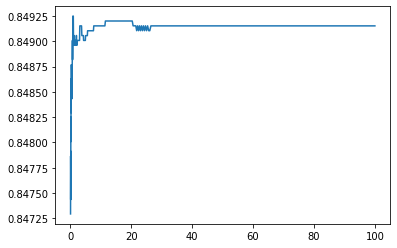

In [77]:
fig, ax = plt.subplots()

x = interval
y = [0] * len(lr_model.scores_[1][0])
for sp in lr_model.scores_[1]:
    y += sp
else:
    y /= 5
#plt.xlim(0,100)
#plt.ylim(0,1)
plt.plot(x,y)
plt.show()

# 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

Примечание: используйте plt.xlim.

In [78]:
lr_model.C_

array([0.95490446])

In [79]:
list(x).index(lr_model.C_)

163

In [80]:
x[156:170]

array([0.86671388, 0.8787954 , 0.89104533, 0.90346602, 0.91605985,
       0.92882923, 0.9417766 , 0.95490446, 0.96821531, 0.9817117 ,
       0.99539623, 1.00927151, 1.02334021, 1.03760502])

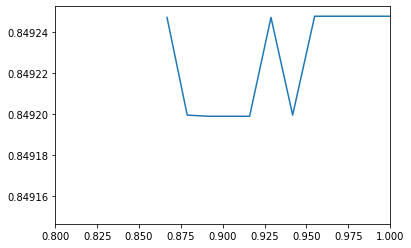

In [81]:
fig, ax = plt.subplots()

x = interval[156:170]
y = [0] * len(lr_model.scores_[1][0])
for sp in lr_model.scores_[1]:
    y += sp
else:
    y /= 5
y = y[156:170]
plt.xlim(0.8,1)
#plt.ylim(0,1)
plt.plot(x,y)
plt.show()

# 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.


In [82]:
from sklearn.metrics import roc_auc_score, roc_curve

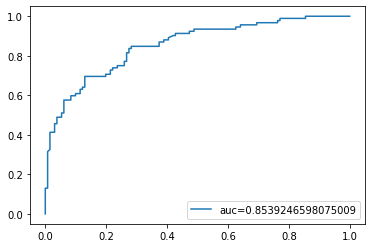

In [83]:
probas = lr_model.predict_proba(X_valid)
fpr, tpr, _ = roc_curve(y_valid, probas[:, 1])
auc = roc_auc_score(y_valid, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()

# 3.1
Вспомните датасет Wine. Загрузите его, разделите на тренировочную и тестовую выборки (random_state=17), используя только [9, 11, 12] признаки.

In [84]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [85]:
wine_dataset = load_wine()

In [86]:
data = wine_dataset['data'][:, [9,11,12]]

In [87]:
X_train, X_valid, y_train, y_valid = train_test_split(data, wine_dataset['target'], random_state=17, test_size=0.2)

Задайте тип кросс-валидации с помощью StratifiedKFold: 5-кратная, random_state=17.

In [88]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [89]:
stf = StratifiedKFold(random_state=17, n_splits=5, shuffle=True)

# 3.2.
Обучите логистическую регрессию (LogisticRegression) с параметром C по умолчанию и random_state=17. Укажите гиперпараметр multi_class='ovr' - по умолчанию многие классификаторы используют именно его. С помощью cross_val_score сделайте кросс-валидацию (используйте объект skf) и выведите среднюю долю правильных ответов на ней (используйте функцию mean). Отдельно выведите долю правильных ответов на тестовой выборке.

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [91]:
from numpy import mean

In [92]:
lr = LogisticRegression(random_state=17, multi_class='ovr')

In [93]:
mean(cross_val_score(lr, X_train, y_train, cv=skf))

0.9152709359605911

In [94]:
mean(cross_val_score(lr, X_valid, y_valid, cv=skf))

0.9464285714285715

# 3.3
Обучите метод опорных векторов (SVC) с random_state=17 и остальными параметрами по умолчанию. Этот метод при мультиклассовой классификации также использует метод "ovr". Сделайте кросс-валидацию (используйте skf) и, как и в предыдущем пункте, выведите среднюю долю правильных ответов на ней. Отдельно выведите долю правильных ответов на тестовой выборке.

In [95]:
from sklearn.svm import SVC

In [96]:
svc = SVC(random_state=17)

In [97]:
mean(cross_val_score(svc, X_train, y_train, cv=skf))

0.6615763546798029

In [98]:
mean(cross_val_score(svc, X_valid, y_valid, cv=skf))

0.7500000000000001

Как видно из полученной метрики, на тестовой выборке метод с гиперпараметрами по умолчанию работает явно намного хуже логистической регрессии. В целом, SVM достаточно плохо масштабируется на размер обучающего набора данных (как видно, даже с тремя признаками он работает не очень хорошо), но благодаря возможности выбора различных ядер (функций близости, которые помогают разделять данные) и другим гиперпараметрам SVM можно достаточно точно настроить под определенный вид данных. Подробнее на этом останавливаться в контексте данного урока не будем

# 3.4
Для предсказаний обеих моделей постройте матрицу ошибок (confusion matrix) и напишите, какие классы каждая из моделей путает больше всего между собой.

In [99]:
confusion_matrix(y_valid, svc.fit(X_train, y_train).predict(X_valid))

array([[ 8,  0,  0],
       [ 0, 16,  0],
       [ 1, 11,  0]], dtype=int64)

SVC иногда путает 2 класс с нулевым(редко), постоянно путает 2 класс с первым

In [100]:
confusion_matrix(y_valid, lr.fit(X_train, y_train).predict(X_valid))

array([[ 8,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 12]], dtype=int64)

Логистическая регрессия ничего не путает

# 3.5
Для каждой модели выведите classification report.

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

Для метода опорных векторов

In [102]:
print(classification_report(y_valid, svc.fit(X_train, y_train).predict(X_valid)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.59      1.00      0.74        16
           2       0.00      0.00      0.00        12

    accuracy                           0.67        36
   macro avg       0.49      0.67      0.56        36
weighted avg       0.46      0.67      0.54        36



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Для логистической регрессии

In [103]:
print(classification_report(y_valid, lr.fit(X_train, y_train).predict(X_valid)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

